Initial DataFrame:
  JobSatisfaction TrainingOpportunities YearsOfService WorkLifeBalance  \
0          Medium                   Few           6-10            Poor   
1            High              Moderate             <1         Average   
2          Medium                   Few            1-2         Average   
3          Medium              Moderate           6-10         Average   
4             Low                  Many           6-10            Good   

  PerformanceScore CommuteTime PromotionHistory   Department  Age Left  
0              Low    60-90min            Never        Sales   57   No  
1             High    30-60min            Never        Sales   47  Yes  
2           Medium    30-60min            Never           HR   48   No  
3             High    60-90min            Never  Engineering   26   No  
4           Medium    60-90min            Never  Engineering   41  Yes  

Transformed DataFrame (One-Hot Encoded):
   Age  JobSatisfaction_High  JobSatisfaction_Low  JobSa

/Users/luisreynosoperez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


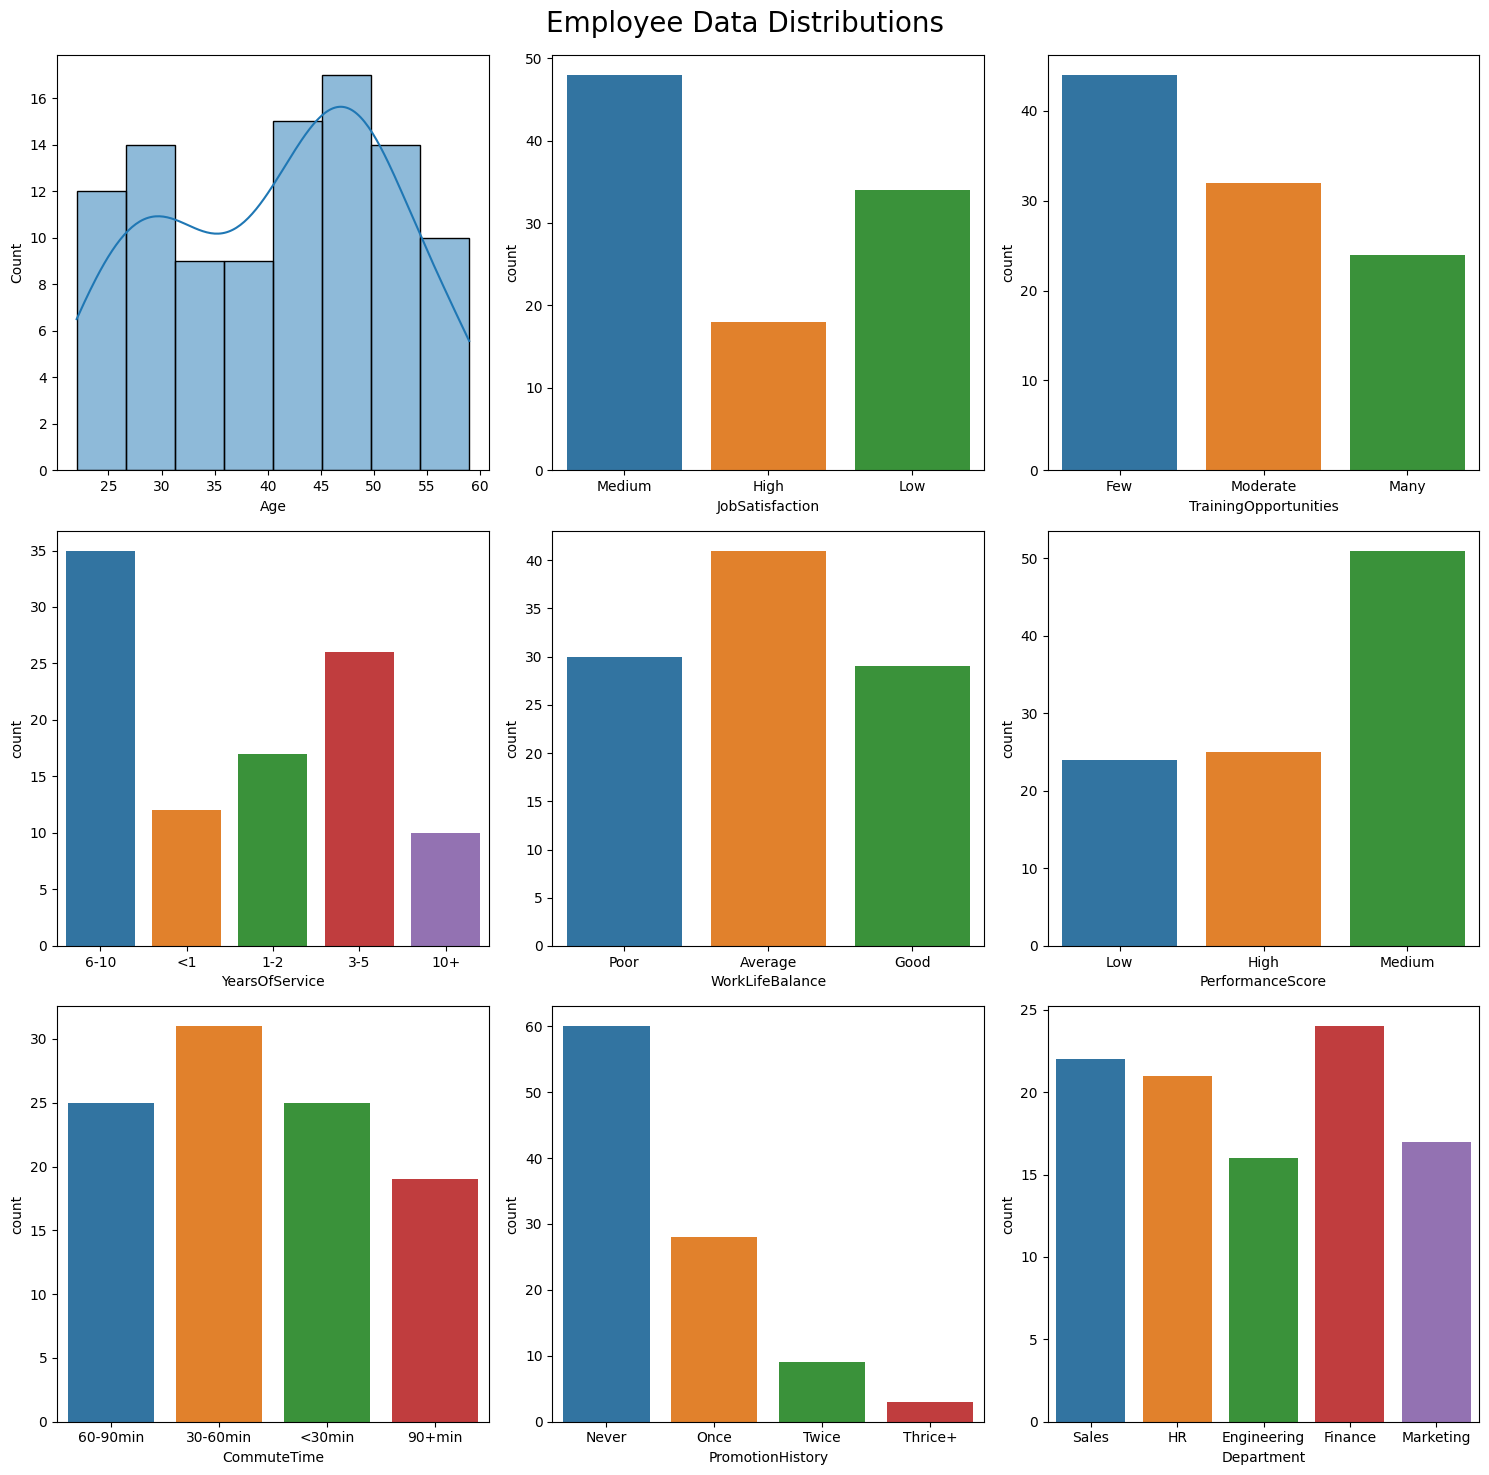


Frequent Itemsets:
{('YearsOfService_6-10',): 35, ('TrainingOpportunities_Few',): 44, ('JobSatisfaction_Medium',): 48, ('Department_Sales',): 22, ('Left_No',): 58, ('PerformanceScore_Low',): 24, ('WorkLifeBalance_Poor',): 30, ('PromotionHistory_Never',): 60, ('CommuteTime_60-90min',): 25, ('YearsOfService_6-10', 'TrainingOpportunities_Few'): 16, ('YearsOfService_6-10', 'JobSatisfaction_Medium'): 15, ('YearsOfService_6-10', 'Department_Sales'): 10, ('YearsOfService_6-10', 'Left_No'): 18, ('YearsOfService_6-10', 'WorkLifeBalance_Poor'): 14, ('YearsOfService_6-10', 'PromotionHistory_Never'): 23, ('YearsOfService_6-10', 'CommuteTime_60-90min'): 10, ('TrainingOpportunities_Few', 'JobSatisfaction_Medium'): 20, ('TrainingOpportunities_Few', 'Left_No'): 25, ('TrainingOpportunities_Few', 'WorkLifeBalance_Poor'): 13, ('TrainingOpportunities_Few', 'PromotionHistory_Never'): 25, ('TrainingOpportunities_Few', 'CommuteTime_60-90min'): 15, ('JobSatisfaction_Medium', 'Department_Sales'): 13, ('JobSat

In [1]:
# Importing necessary libraries
import pandas as pd  # Pandas is used for data manipulation and analysis
import numpy as np  # NumPy is used for numerical operations
from itertools import combinations  # Combinations is used to generate itemset combinations
import matplotlib.pyplot as plt  # Matplotlib is used for data visualization
import networkx as nx  # NetworkX is used for creating and visualizing network graphs
import seaborn as sns  # Seaborn is used for statistical data visualization

# Setting the random seed for reproducibility
np.random.seed(42)
n = 100  # Number of employees

# Creating a more complex dataset of employee attributes
data = {
    'JobSatisfaction': np.random.choice(['Low', 'Medium', 'High'], n, p=[0.3, 0.5, 0.2]),
    'TrainingOpportunities': np.random.choice(['Few', 'Moderate', 'Many'], n, p=[0.4, 0.4, 0.2]),
    'YearsOfService': np.random.choice(['<1', '1-2', '3-5', '6-10', '10+'], n, p=[0.1, 0.2, 0.3, 0.3, 0.1]),
    'WorkLifeBalance': np.random.choice(['Poor', 'Average', 'Good'], n, p=[0.3, 0.4, 0.3]),
    'PerformanceScore': np.random.choice(['Low', 'Medium', 'High'], n, p=[0.2, 0.6, 0.2]),
    'CommuteTime': np.random.choice(['<30min', '30-60min', '60-90min', '90+min'], n, p=[0.25, 0.35, 0.25, 0.15]),
    'PromotionHistory': np.random.choice(['Never', 'Once', 'Twice', 'Thrice+'], n, p=[0.5, 0.3, 0.15, 0.05]),
    'Department': np.random.choice(['HR', 'Engineering', 'Sales', 'Marketing', 'Finance'], n),
    'Age': np.random.randint(22, 60, n),
    'Left': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])
}

# Creating a DataFrame from the dataset
df = pd.DataFrame(data)

# One-Hot Encoding the categorical variables
df_trans = pd.get_dummies(df)

# Printing the initial and transformed DataFrames
print("Initial DataFrame:")
print(df.head())
print("\nTransformed DataFrame (One-Hot Encoded):")
print(df_trans.head())

# Function to visualize the distributions of employee data
def visualize_data(df):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle('Employee Data Distributions', fontsize=20)

    # Plotting distributions using seaborn
    sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
    sns.countplot(x='JobSatisfaction', data=df, ax=axes[0, 1])
    sns.countplot(x='TrainingOpportunities', data=df, ax=axes[0, 2])
    sns.countplot(x='YearsOfService', data=df, ax=axes[1, 0])
    sns.countplot(x='WorkLifeBalance', data=df, ax=axes[1, 1])
    sns.countplot(x='PerformanceScore', data=df, ax=axes[1, 2])
    sns.countplot(x='CommuteTime', data=df, ax=axes[2, 0])
    sns.countplot(x='PromotionHistory', data=df, ax=axes[2, 1])
    sns.countplot(x='Department', data=df, ax=axes[2, 2])

    # Adjusting the layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Visualizing the employee data distributions
visualize_data(df)

# Apriori Algorithm Implementation
def apriori(transactions, min_support):
    def get_frequent_itemsets(transactions, itemsets, min_support):
        itemset_counts = {itemset: 0 for itemset in itemsets}
        for transaction in transactions:
            for itemset in itemsets:
                if all(item in transaction for item in itemset):
                    itemset_counts[itemset] += 1
        return {itemset: count for itemset, count in itemset_counts.items() if count / len(transactions) >= min_support}
    
    # Converting each transaction to a frozenset of the items present in it
    transactions = transactions.apply(lambda row: frozenset(row[row == 1].index), axis=1)
    itemsets = [(col,) for col in transactions.iloc[0]]
    frequent_itemsets = {}
    
    # Iteratively finding frequent itemsets
    while itemsets:
        curr_frequent_itemsets = get_frequent_itemsets(transactions, itemsets, min_support)
        frequent_itemsets.update(curr_frequent_itemsets)
        itemsets = list(combinations(set().union(*[set(itemset) for itemset in curr_frequent_itemsets.keys()]), len(itemsets[0]) + 1))
        
    return frequent_itemsets

# Generating association rules from frequent itemsets
def generate_rules(frequent_itemsets, min_confidence):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for consequent in itemset:
                antecedent = tuple(item for item in itemset if item != consequent)
                if antecedent in frequent_itemsets:
                    confidence = frequent_itemsets[itemset] / frequent_itemsets[antecedent]
                    if confidence >= min_confidence:
                        rules.append({
                            'antecedent': antecedent,
                            'consequent': (consequent,),
                            'support': frequent_itemsets[itemset] / len(df_trans),
                            'confidence': confidence
                        })
    return rules

# Applying the Apriori algorithm to find frequent itemsets
min_support = 0.1  # Adjusted for larger dataset
frequent_itemsets = apriori(df_trans, min_support)
print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Generating association rules from the frequent itemsets
min_confidence = 0.5  # Lowered confidence threshold
rules = generate_rules(frequent_itemsets, min_confidence)
print("\nGenerated Rules:")
for rule in rules:
    print(rule)

# Filtering rules to focus on retention (Left_Yes)
filtered_retention_rules = [rule for rule in rules if ('Left_Yes',) in rule['consequent']]
print("\nFiltered Retention Rules:")
print(filtered_retention_rules)

# Converting the rules to a DataFrame for better readability
retention_rules_df = pd.DataFrame(filtered_retention_rules)
print("\nRetention Rules DataFrame:")
print(retention_rules_df)

# Implementing function to visualize association rules using a network graph
def visualize_rules(rules):
    if not rules:
        print("No rules to visualize.")
        return
    
    G = nx.DiGraph()
    for rule in rules:
        antecedent = ', '.join(rule['antecedent'])
        consequent = ', '.join(rule['consequent'])
        G.add_edge(antecedent, consequent, weight=rule['confidence'])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, font_size=10, font_weight='bold')
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Association Rules Network Graph', fontsize=20)
    plt.show()

# Visualizing the filtered retention rules
visualize_rules(filtered_retention_rules)